In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term
target_terms = ("@BBCNews", "@CBSNews", "@CNN",
                "@FoxNews", "@nytimes")

In [3]:
# Define a function to return sentiment for all search terms
def news_sentiment(target):
    counter = 0
    
    # variables for holding sentiment
    sentiments = []
    # Run search around each tweet
    news_tweets = api.user_timeline(target, count=100)
    
    # Loop through all tweets
    for tweet in news_tweets:
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments.append({"twitter source account" : target,
            "Tweets ago" : tweets_ago,
            "Date" : tweet['created_at'],
            "Compound" : compound,
            'Negative' : neg,
            "Positive"  : pos,
            "Neutral"  : neu,
            "tweet_text" : tweet["text"]})
        

        # Add to counter 
        counter = counter + 1
        
    # Create a dataframe from sentiments dictionary
    data= pd.DataFrame.from_dict(sentiments)
    data.sort_index(axis=0 ,ascending=True, inplace = True)  
    return  data
        

In [4]:
# Extracting BBC news sentiment from the dataframe
bbc = news_sentiment('@BBCNews')

# Use datetime library to convert Data stored in string to datetime format
bbc['Date'] = pd.to_datetime(bbc['Date'])
bbc.head()


,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
0,-0.2960,2018-04-09 21:24:38,0.167,0.833,0.0,0,"Tuesday's Telegraph: ""'Act now to stop chemica...",@BBCNews
1,-0.6597,2018-04-09 21:19:39,0.286,0.714,0.0,1,"Tuesday's i: ""UK plan to beat prostate cancer""...",@BBCNews
2,-0.4019,2018-04-09 21:19:35,0.213,0.787,0.0,2,"Tuesday's Express: ""Revealed: shocking treatme...",@BBCNews
3,0.0000,2018-04-09 21:07:56,0.000,1.000,0.0,3,"Tuesday's Metro: ""Shrine to burglar... outside...",@BBCNews
4,-0.3182,2018-04-09 21:07:48,0.141,0.859,0.0,4,"Tuesday's FT: ""Russian stocks battered by new ...",@BBCNews


In [5]:
# Extracting CBS news sentiment from the dataframe
cbs = news_sentiment('@CBSNews')
cbs['Date'] = pd.to_datetime(cbs['Date'])
cbs.head()

,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
0,0.6705,2018-04-09 21:21:49,0.000,0.756,0.244,0,Los Angeles is painting some of its roads whit...,@CBSNews
1,0.3612,2018-04-09 20:54:07,0.000,0.884,0.116,1,"""Whether this is related to the [special couns...",@CBSNews
2,0.0000,2018-04-09 20:37:01,0.000,1.000,0.000,2,"NEW: ""The decision by the US Attorney’s Office...",@CBSNews
3,-0.4448,2018-04-09 20:35:49,0.128,0.872,0.000,3,"MORE: ""It is unclear whether this is stemming ...",@CBSNews
4,0.0000,2018-04-09 20:32:27,0.000,1.000,0.000,4,"""We did learn that the seizure by FBI and law ...",@CBSNews


In [6]:
# Extracting CNN news sentiment from the dataframe
cnn = news_sentiment('@CNN')
cnn['Date'] = pd.to_datetime(cnn['Date'])
cnn.head()

,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
0,0.0000,2018-04-09 21:25:46,0.000,1.000,0.000,0,The nonpartisan Congressional Budget Office ha...,@CNN
1,-0.4588,2018-04-09 21:12:14,0.218,0.704,0.077,1,The biggest Black Lives Matter page on Faceboo...,@CNN
2,0.0000,2018-04-09 21:00:54,0.000,1.000,0.000,2,First Fortune 500 Latina CEO Geisha Williams t...,@CNN
3,-0.4215,2018-04-09 20:54:26,0.209,0.697,0.094,3,The monster responsible for these attacks has ...,@CNN
4,0.0000,2018-04-09 20:48:09,0.000,1.000,0.000,4,JUST IN: President Trump has been watching TV ...,@CNN


In [7]:
# Extracting FOX news sentiment from the dataframe
fox = news_sentiment('@FoxNews')
fox['Date'] = pd.to_datetime(fox['Date'])
fox.head()

,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
0,0.0000,2018-04-09 21:28:49,0.000,1.000,0.000,0,"FBI raids home, office of Trump attorney Micha...",@FoxNews
1,0.3182,2018-04-09 21:25:15,0.122,0.667,0.212,1,.@kimguilfoyle on alleged chemical attack in S...,@FoxNews
2,0.0000,2018-04-09 21:14:17,0.000,1.000,0.000,2,"UPDATE: FBI raids home, office of #Trump attor...",@FoxNews
3,0.0000,2018-04-09 20:51:00,0.000,1.000,0.000,3,Fleetwood Mac replacing Lindsey Buckingham bef...,@FoxNews
4,-0.8020,2018-04-09 20:41:00,0.474,0.526,0.000,4,Opioid crisis worse than Pablo Escobar era: ex...,@FoxNews


In [8]:
# Extracting NYT news sentiment from the dataframe
nyt = news_sentiment('@nytimes')
nyt['Date'] = pd.to_datetime(nyt['Date'])
nyt.head()

,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
0,-0.1027,2018-04-09 21:32:04,0.235,0.542,0.223,0,A Brooklyn man's mind began to unravel after t...,@nytimes
1,-0.2732,2018-04-09 21:17:06,0.174,0.618,0.208,1,RT @ABarnardNYT: New court papers contend top ...,@nytimes
2,0.0000,2018-04-09 21:00:07,0.000,1.000,0.000,2,🤫\nhttps://t.co/ivXQVRb3TB,@nytimes
3,0.5106,2018-04-09 20:50:07,0.000,0.875,0.125,3,RT @MarkLandler: “A pleasant guy can still end...,@nytimes
4,0.0000,2018-04-09 20:40:12,0.000,1.000,0.000,4,One NYT reader's reaction to President Trump s...,@nytimes


In [9]:
# Concatenate multiple data frames into a single frame
frames = [bbc, cbs, cnn, fox, nyt]
result = pd.concat(frames)
result.head()

,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
0,-0.2960,2018-04-09 21:24:38,0.167,0.833,0.0,0,"Tuesday's Telegraph: ""'Act now to stop chemica...",@BBCNews
1,-0.6597,2018-04-09 21:19:39,0.286,0.714,0.0,1,"Tuesday's i: ""UK plan to beat prostate cancer""...",@BBCNews
2,-0.4019,2018-04-09 21:19:35,0.213,0.787,0.0,2,"Tuesday's Express: ""Revealed: shocking treatme...",@BBCNews
3,0.0000,2018-04-09 21:07:56,0.000,1.000,0.0,3,"Tuesday's Metro: ""Shrine to burglar... outside...",@BBCNews
4,-0.3182,2018-04-09 21:07:48,0.141,0.859,0.0,4,"Tuesday's FT: ""Russian stocks battered by new ...",@BBCNews


In [10]:
# Export the new CSV as "NewsMedia.csv"
output_fn = "NewsMedia.csv"
result.to_csv(output_fn)

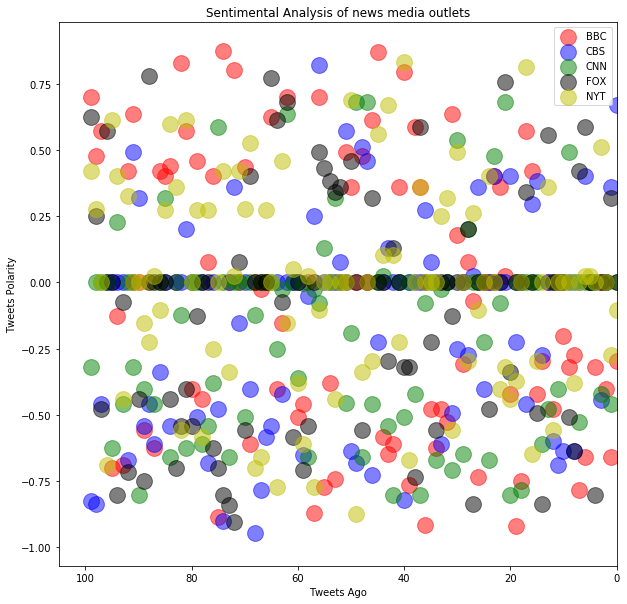

In [11]:
# Plotting a scatter plot to visualize polarity analysis of 500 tweets from five different news outlets
plt.figure(figsize=(10,10))
plt.scatter(bbc['Tweets ago'], bbc['Compound'], c='r', alpha = 0.5,  s = 250,  label = 'BBC')
plt.scatter(cbs['Tweets ago'], cbs['Compound'], c='b', alpha = 0.5,  s = 250,  label = 'CBS')
plt.scatter(cnn['Tweets ago'], cnn['Compound'], c='g', alpha = 0.5,  s = 250,  label = 'CNN')
plt.scatter(fox['Tweets ago'], fox['Compound'], c='k', alpha = 0.5,  s = 250,  label = 'FOX')
plt.scatter(nyt['Tweets ago'], nyt['Compound'], c='y', alpha = 0.5,  s = 250,  label = 'NYT')
plt.xlim(105,-0.05)
plt.legend(loc='best')
plt.title('Sentimental Analysis of news media outlets')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweets Polarity')
plt.savefig('PolarityOutput.png')
plt.show()


In [12]:
# Calculating mean compound for all 5 news media
avg_compound = {
    'BBC':np.mean(bbc['Compound']),
    'CBS':np.mean(cbs['Compound']),
    'CNN':np.mean(cnn['Compound']),
    'FOX':np.mean(fox['Compound']),
    'NYT':np.mean(nyt['Compound'])
}
avg_compound

{'BBC': -0.051695000000000005,
 'CBS': -0.136475,
 'CNN': -0.154605,
 'FOX': -0.08978100000000001,
 'NYT': -0.013751999999999978}

In [13]:
# compound dataframe
compound_df = pd.DataFrame([avg_compound]).round(3)
compound_df

,BBC,CBS,CNN,FOX,NYT
0,-0.052,-0.136,-0.155,-0.09,-0.014


In [14]:
# Extracting x_values from the compound dataframe
x_values = list(compound_df)
x_values

['BBC', 'CBS', 'CNN', 'FOX', 'NYT']

In [15]:
# Extracting y_values from the compound dataframe
y_values = []
for y in x_values:
    y_val = compound_df[y][0]
    y_values.append(y_val)
print(y_values)    

[-0.052, -0.136, -0.155, -0.09, -0.014]


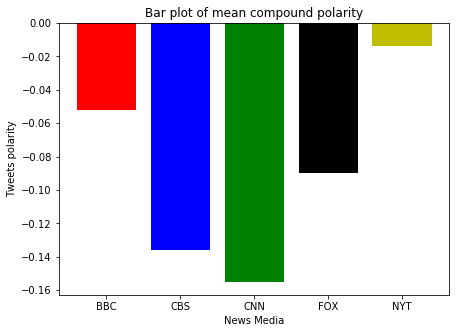

In [16]:
# Plotting a bar chart to represent mean compound 
plt.figure(figsize=(7,5))
plt.bar(x_values,y_values, color = ['r','b','g','k','y'])
plt.title('Bar plot of mean compound polarity')
plt.xlabel('News Media')
plt.ylabel('Tweets polarity')
plt.savefig('BarplotOutput.png')
plt.show()

In [ ]:
Three observable trends
BBC news seem to send out both postive and negative tweets at the same ratio.
New York Times is mostly positively bias.
The bar plot showed negative polarity for all news media with CNN being the most negatively biased.
